## **Importing the Required Library**

In [316]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import catboost as cat_
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import pickle
# import optuna.integration.lightgbm as lgb2


## **Reading Dataset**

In [317]:
data = pd.read_csv("Fertilizer Prediction.csv")
data

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [318]:
def null_check(data):
    return data.isnull().sum(axis = 0).reset_index();

In [319]:
def duplicate_check(data):
    duplicates = data.duplicated().sum(axis=0)
    print(f'Duplicated exist {duplicates == True}')
    return 

In [320]:
def data_information(data):
    print('Data Information Table')
    display(data.info())
    print('\n Data Head Table')
    display(data.head())
    print('\n Data Describe Information Table')
    display(data.describe())
    print(f'\n Data Shape: {data.shape}')
    print(f'\n Data Columns {data.columns}')
    print('\n Data Null item Information Table')
    display(null_check(data))
    duplicate_check(data)
    return

In [321]:
data_information(data)

Data Information Table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


None


 Data Head Table


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea



 Data Describe Information Table


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000



 Data Shape: (99, 9)

 Data Columns Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

 Data Null item Information Table


,index,0
0,Temparature,0
1,Humidity,0
2,Moisture,0
3,Soil Type,0
4,Crop Type,0
5,Nitrogen,0
6,Potassium,0
7,Phosphorous,0
8,Fertilizer Name,0


Duplicated exist False


In [322]:
for column in data.columns : 
    print('Number of unique data for {0} is {1}'.format(column , len(data[column].unique())))
    print('unique data for {0} is {1}'.format(column , data[column].unique()))
    print('=====================================')

Number of unique data for Temparature is 14
unique data for Temparature is [26 29 34 32 28 25 33 30 27 31 35 37 36 38]
Number of unique data for Humidity  is 13
unique data for Humidity  is [52 65 62 54 50 64 60 58 68 70 67 53 72]
Number of unique data for Moisture is 41
unique data for Moisture is [38 45 62 34 46 35 64 50 42 33 28 48 65 41 31 49 39 52 44 53 37 63 30 32
 36 40 27 61 26 58 60 43 29 51 47 54 56 57 55 59 25]
Number of unique data for Soil Type is 5
unique data for Soil Type is ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Number of unique data for Crop Type is 11
unique data for Crop Type is ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Number of unique data for Nitrogen is 24
unique data for Nitrogen is [37 12  7 22 35  9 41 21 13 14 36 24 10 38 39 11 23  8 15  5 40  6 42  4]
Number of unique data for Potassium is 13
unique data for Potassium is [ 0  9 10  7 15 13 14  8 12 18 19 16 17]
Number of unique data for

## **Visualization**

In [323]:
def make_pie(feature) :
    sns.set(rc = {'figure.figsize':(10, 10)})
    # print(data[feature].value_counts())
    # print(data[feature].value_counts().index)
    plt.pie(data[feature].value_counts(),labels=list(data[feature].value_counts().index),
        autopct ='%1.2f%%' , labeldistance = 1.1,explode = [0.05 for i in range(len(data[feature].value_counts()))] )
    plt.show()

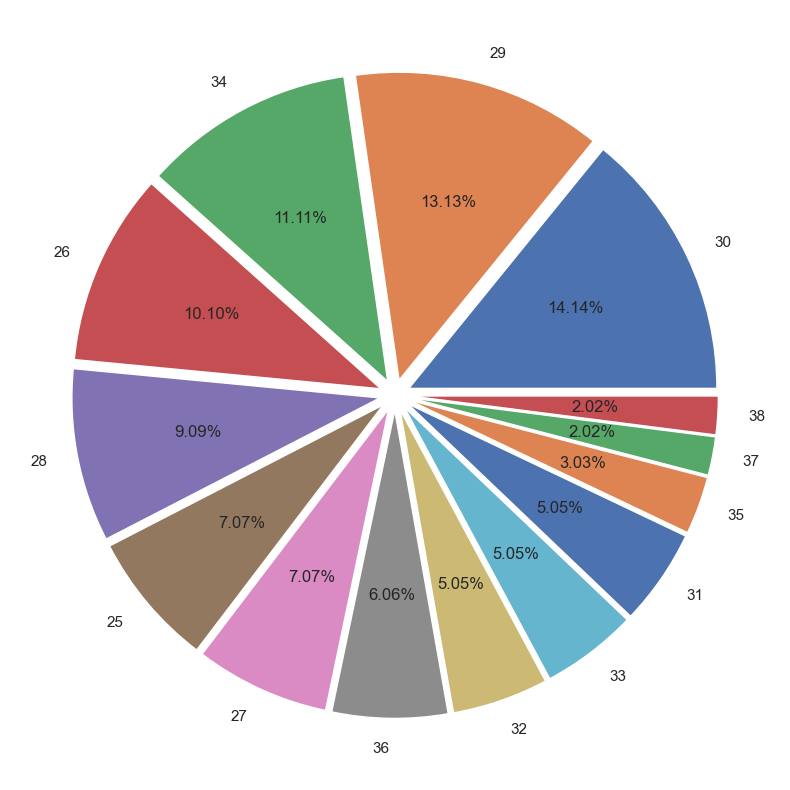

In [324]:
make_pie('Temparature')

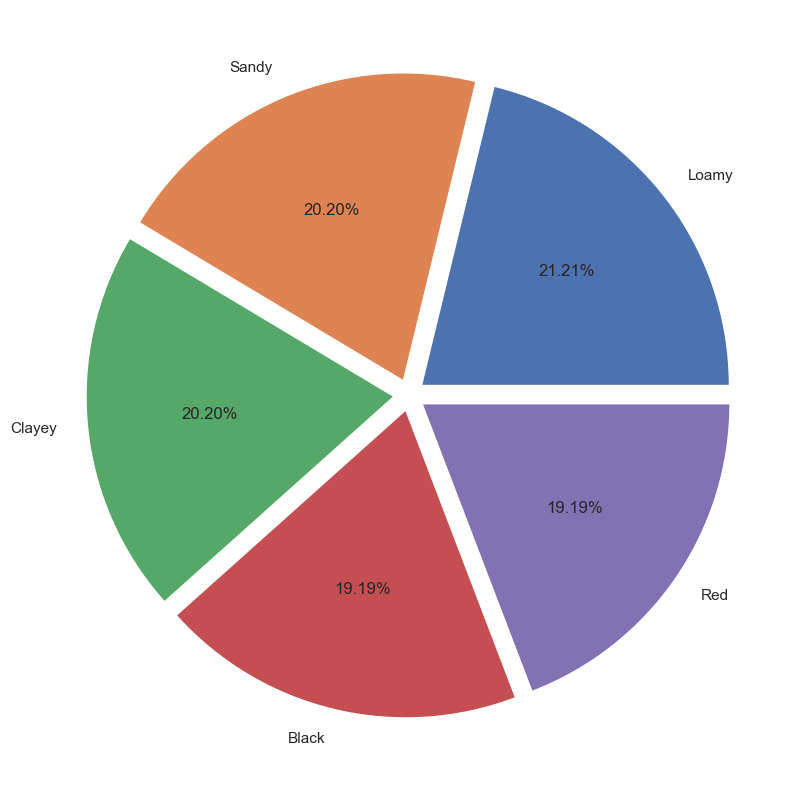

In [325]:
make_pie('Soil Type')

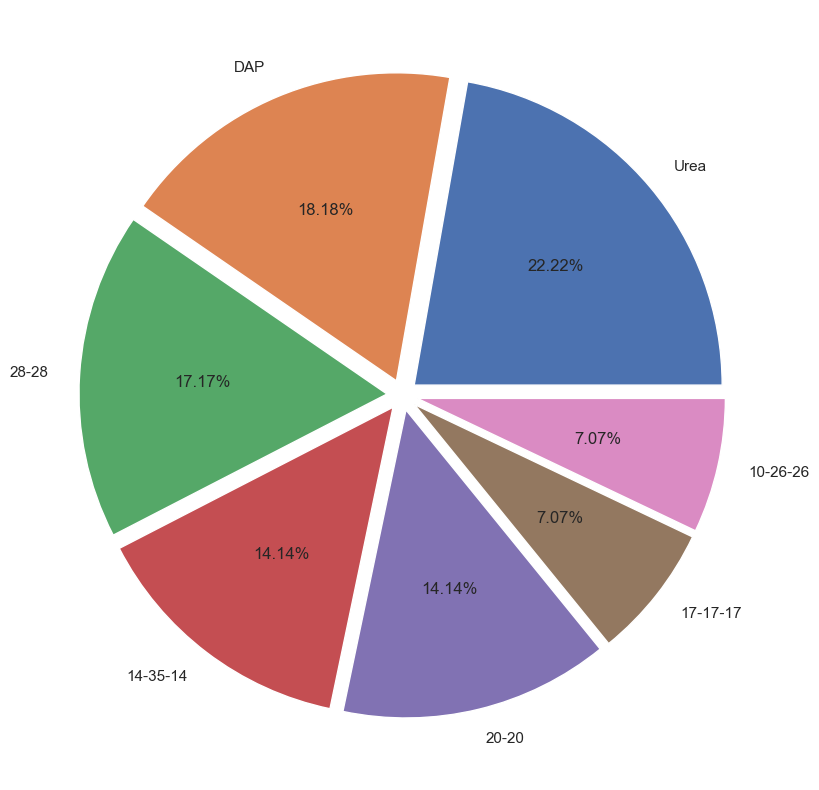

In [326]:
make_pie('Fertilizer Name')

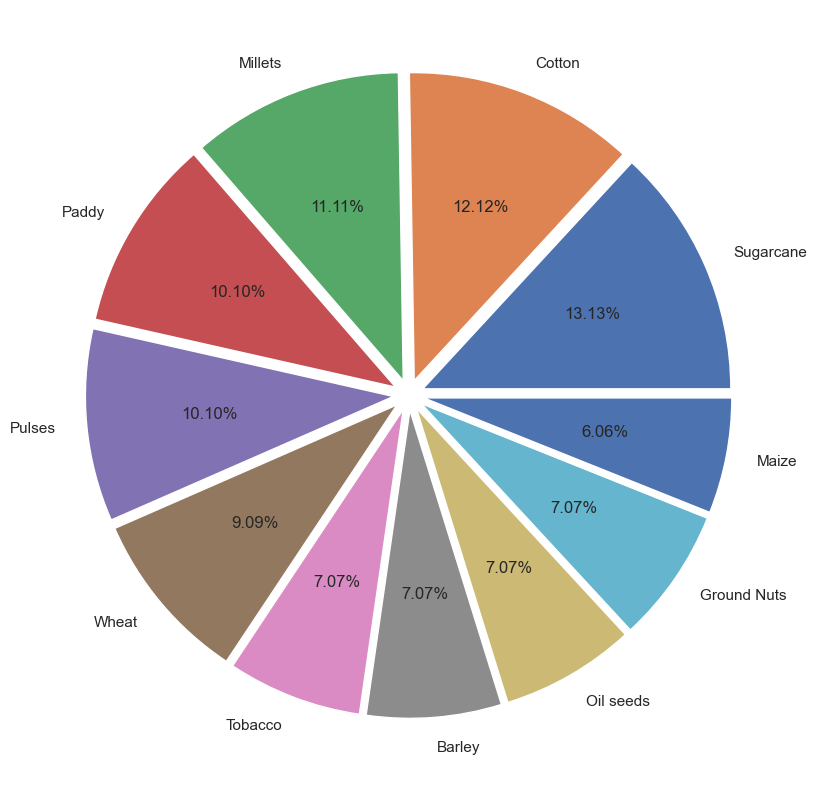

In [327]:
make_pie('Crop Type')

## **Data Engineering**

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [329]:
def make_label_encoder(original_feature , new_feature) : 
    enc  = LabelEncoder()
    enc.fit(data[original_feature])
    data[new_feature] = enc.transform(data[original_feature])
    data.drop([original_feature],axis=1, inplace=True)
    enc_type = pd.DataFrame(zip(enc.classes_,enc.transform(enc.classes_)),columns=['Original','Encoded'])
    enc_type.set_index('Original')
    print(enc_type)

In [330]:
make_label_encoder('Soil Type','Soil_Code')

  Original  Encoded
0    Black        0
1   Clayey        1
2    Loamy        2
3      Red        3
4    Sandy        4


In [331]:
make_label_encoder('Crop Type','Crop_Code')

       Original  Encoded
0        Barley        0
1        Cotton        1
2   Ground Nuts        2
3         Maize        3
4       Millets        4
5     Oil seeds        5
6         Paddy        6
7        Pulses        7
8     Sugarcane        8
9       Tobacco        9
10        Wheat       10


In [332]:
make_label_encoder('Fertilizer Name','Fertilizer_Code')

   Original  Encoded
0  10-26-26        0
1  14-35-14        1
2  17-17-17        2
3     20-20        3
4     28-28        4
5       DAP        5
6      Urea        6


## **Modelling**

In [333]:
train_main = data.drop('Fertilizer_Code', axis=1).copy() # independent variable
target = data['Fertilizer_Code'].copy() #dependent variable

In [334]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_main, target, train_size=0.7, shuffle=True, random_state=42)

In [335]:
train_col = X_train.columns
test_col = X_test.columns
print(train_col)
print(test_col)

Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil_Code', 'Crop_Code'],
      dtype='object')
Index(['Temparature', 'Humidity ', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil_Code', 'Crop_Code'],
      dtype='object')


- ### Scale the features using MinMaxScaler

In [336]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)
# print(X_train)

In [337]:
#Save the  trained model
pickle_out = open('minmax.pkl','wb')
pickle.dump(ms,pickle_out)
pickle_out.close()

In [338]:
X_train = pd.DataFrame(X_train, columns=[train_col])
X_test = pd.DataFrame(X_test, columns=[test_col])

In [339]:
X_test.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Code,Crop_Code
0,0.692308,0.681818,0.975,0.527778,0.000000,0.476190,0.00,0.1
1,0.153846,0.181818,0.125,0.222222,0.000000,0.309524,0.25,0.7
2,0.384615,0.454545,0.050,-0.027778,0.894737,0.404762,0.75,0.9
3,0.230769,0.181818,1.000,0.944444,0.000000,0.000000,0.00,0.1
4,0.846154,0.454545,0.450,0.277778,0.000000,0.976190,1.00,0.4


- ### Scale the features using Standarization

In [340]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Training Models

In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")

Logistic Regression  with accuracy : 0.9
Naive Bayes  with accuracy : 1.0
Support Vector Machine  with accuracy : 0.8
K-Nearest Neighbors  with accuracy : 0.6
Decision Tree  with accuracy : 1.0
Random Forest  with accuracy : 1.0
Bagging  with accuracy : 1.0
AdaBoost  with accuracy : 0.6


c:\Users\Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting  with accuracy : 0.9666666666666667
Extra Trees  with accuracy : 0.4666666666666667


In [342]:
from sklearn.metrics import classification_report, accuracy_score

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)


1.0

In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [344]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [345]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [346]:
accuracy_score(y_test, y_pred)

1.0

In [347]:
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(model2,pickle_out)
pickle_out.close()

In [348]:
import pickle
pickle_out = open('fertilizer1.pkl','wb')
pickle.dump(classifier,pickle_out)
pickle_out.close()

In [349]:
pickled_model = pickle.load(open('D:\OPEN SOURCE\Model Traning code\\fertiliser\\fertilizer.pkl', 'rb'))

In [350]:
model = pickle.load(open('D:\OPEN SOURCE\Model Traning code\\fertiliser\\fertilizer1.pkl', 'rb'))

In [351]:
pickled_scale = pickle.load(open('D:\OPEN SOURCE\Model Traning code\\fertiliser\\minmax.pkl', 'rb'))

In [352]:
pickled_sc= pickle.load(open('D:\OPEN SOURCE\Model Traning code\\fertiliser\\standscaler.pkl', 'rb'))

In [353]:
# Fertilizers = { 0:"10-26-26", 
#                 1:"14-35-14",
#                 2:"17-17-17",
#                 3:"20-20",
#                 4: "28-28",
#                 5: "DAP",
#                 6: "Urea"}
# input_values = pickled_scale.transform([[25,50,32,24,0,19,1,3]])
# Fertilizers[pickled_model.predict(input_values)[0]]

In [354]:
import numpy as np


def predict_fertilizer(Temparature, Humidity, Moisture, Nitrogen, Potassium, Phosphorous, Soil, Crop):

    Fertilizers = {
                    0: "10-26-26",
                    1: "14-35-14",
                    2: "17-17-17",
                    3: "20-20",
                    4: "28-28",
                    5: "DAP",
                    6: "Urea"
                }


    Crop_to_code = {

        "Barley": 0,

        "Cotton": 1,

        "Ground Nuts": 2,

        "Maize": 3,

        "Millets": 4,

        "Oil seeds": 5,

        "Paddy": 6,

        "Pulses": 7,

        "Sugarcane": 8,

        "Tobacco": 9,

        "Wheat": 10
    }


    Soil_to_code = {

        "Black": 0,

        "Clayey": 1,

        "Loamy": 2,

        "Red": 3,

        "Sandy": 4
    }


    # input_values = pickled_scale.transform(
    #     [[Temparature, Humidity, Moisture, Nitrogen, Potassium, Phosphorous, Soil_to_code[Soil], Crop_to_code[Crop]]])
    input_value = np.array([[Temparature, Humidity, Moisture, Nitrogen,Potassium, Phosphorous, Soil_to_code[Soil], Crop_to_code[Crop]]])
    # print(input_value)
    transformed_features = ms.fit_transform(input_value)
    transformed_features = pickled_sc.fit_transform(transformed_features)

    # prediction from fertilizer.pkl
    ans = pickled_model.predict(transformed_features)

    # prediction from fertilizer1.pkl
    ans2 = model.predict(transformed_features)

    # print(Fertilizers[pickled_model.predict(transformed_features)[0]])

    print(Fertilizers[ans[0]])
    print(Fertilizers[ans2[0]])

In [361]:
# predict_fertilizer(26,52,35,12,10,13,"Sandy","Barley")
predict_fertilizer(29,58,52,13,0,36,"Loamy","Wheat")
# predict_fertilizer(28,54,37,36,0,0,"Black","Millets")

28-28
28-28
